## Quiz 2 - Probability, Statistics (ლექცია 4, ლექცია 5) - 7 ქულა

იხილეთ LoanStatus.csv მონაცემთა ფაილი, რომელშიც მოცემულია კლიენტთა ინფორმაცია შემდეგი სვეტებით:

Loan ID - კლიენტის ID

Gender - სქესი

Married - დაქორზინებული არის თუ არა

Dependents - ოჯახის წევრების რაოდენობა, რომლის ფინანსურ მხარდაჭერასაც უზრუნველყოფს კლიენტი

Education - არის თუ არა უმაღლესი განათლების მქონე

Self_Employed - არის თუ არა თვითდასაქმებული

ApplicantIncome - კლიენტის შემოსავალი (per month)

LoanAmount  - სესხის რაოდენობა (ათასებში)

Loan_Amount_Term - სესხის ვადა

Credit_History - როგორი საკრედიტო ისტორია აქვს კლიენტს (1-კარგი, 0-ცუდი)

Property_Area - საცხოვრებელი და სამუშაო ადგილი

Loan_Status - სესხის გაცემის სტატუსი


## დავალება 1: აღწერილობითი სტატისტიკა  (1 ქულა)
ა) გახსენით ფაილი და დაბეჭდეთ აღწერილობითი სტატისტიკის მონაცემები თქვენთვის საინტერესო ველებისთვის, როგორიცაა საშუალო, მედიანა, მოდა, სტდ. გადახრა, ა.შ. (მოახდინეთ სიტყვიერი ინტერპრეტაცია);

ბ) დაითვალეთ თითოეულ სვეტში ცარიელი მნიშვნელობების რაოდენობა შესაბამისი ფუნქციით

In [1]:
import pandas as pd
import warnings

from scipy.stats import norm
warnings.filterwarnings("ignore")

df = pd.read_csv("LoanStatus.csv")

print(int(df.ApplicantIncome.median()), "AVG salary")  # საშუალო შემოსავალი
print(int(df.ApplicantIncome.min()), "minimum salary")  # მინიმუმი შემოსავალი გამოკითხულთა სიიდან
print(int(df.ApplicantIncome.max()), "maximum salary")  # მაქსიმუმი შემოსავალი გამოკითხულთა სიიდან

df.isnull().sum()      # Empty rows in each collumn

3812 AVG salary
150 minimum salary
81000 maximum salary


Loan_ID              0
Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
ApplicantIncome      0
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

## დავალება 2:  ალბათობა (1 ქულა)
ა) დაითვალეთ, რა არის სესხის აღების ალბათობა Loan_Status-ის მიხედვით.

ბ) რა არის სესხის აღების ალბათობა, მაშინ როცა კლიენტს კარგი საკრედიტო ისტორია აქვს.

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

In [2]:
loan_stat = df[df["Loan_Status"] == "Y"]["Loan_Status"].count()
total_data = df["Loan_Status"].count()

probability = loan_stat / total_data
probability

#სესხის აღების ალბათობა

0.6872964169381107

In [ ]:
import pandas as pd

# Filter the DataFrame to count the number of 'Loan_Status' being 'Y' with 'Credit_History' as 1
filter_clause = (df["Loan_Status"] == "Y") & (df["Credit_History"] == 1)
approved_with_good_credit = df[filter_clause]["Loan_Status"].count()

# Total number of 'Loan_Status' being 'Y'
total_approved_loans = df[df["Loan_Status"] == "Y"]["Loan_Status"].count()

# Calculate conditional probability
conditional_probability = approved_with_good_credit / total_approved_loans
conditional_probability

## დავალება 3: გრაფიკული წარმოდგენა (1 ქულა)
ა) seaborn.distplot ან seaborn.histplot() ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი გრაფიკი. ლინკი: https://seaborn.pydata.org/generated/seaborn.distplot.html

ბ) matplotlib.pyplot.hist ფუნქციის გამოყენებით, ააგეთ რომელიმე სვეტისთვის შესაბამისი ჰისტოგრამი, რომელშიც bin-ების (ჰოსტოგრამაში ბლოკების) რაოდენობას თქვენ განსაზღვრავთ (მაგ. ჰისტოგრამაში 10 სვეტად წარმოადგინოთ მონაცემები.) იხ. დოკუმენტაცია შემდეგ ლინკზე: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html 

Future warnings-ების გამოსართავად ჩაწერეთ შემდეგი ბრძანებები:
import warnings
warnings.filterwarnings("ignore")

კოდს დაურთეთ თქვენი კომენტარები მოკლედ

<Axes: xlabel='Gender', ylabel='Count'>

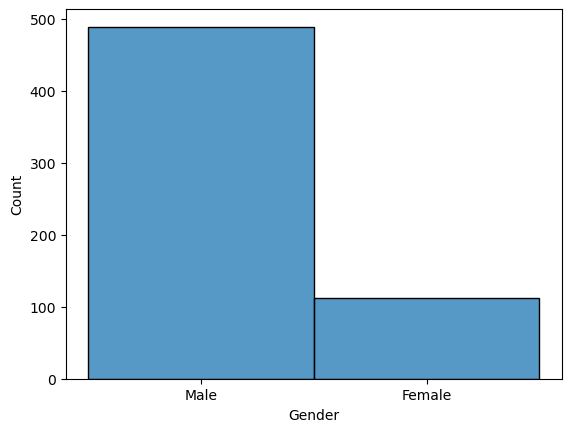

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

genders = df["Gender"]
sns.histplot(genders)
#ქალის და კაცის დაოდენობა შესაბამისი ცხრილის მიხედვით

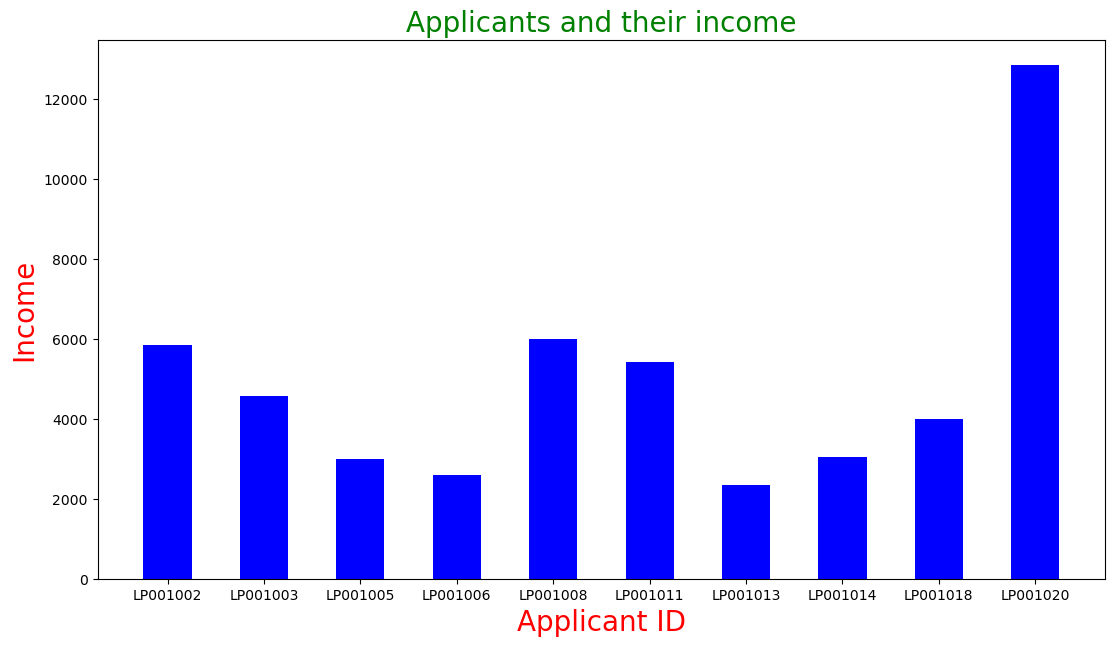

In [4]:
fig, ax = plt.subplots(figsize=(13, 7))
applicant_id = df['Loan_ID'].head(10)   # განმცხადებლების სიიდან პირველი 10 პიროვნების ასარჩევად
income = df["ApplicantIncome"].head(10) # შემოსავლის სიიდან პირველი 10 პიროვნების შემოსავლის ასარჩევად
ax.set_xlabel('Applicant ID', fontsize = 20, color = 'r')
ax.set_ylabel('Income', fontsize = 20, color = 'r')

ax.set_title('Applicants and their income', color='g', fontsize = 20)
ax.bar(applicant_id, income, color = 'b', width = 0.5)

plt.show()

#მოცემული დიაგრამის მიხედვით წარმოდგენილია განმცხადებლების ID და მათი შემოსავალი

## დავალება 4:  კუმულაციური ალბათობა (Cumulative distribution function) - (1 ქულა)
დაითვალეთ შემდეგი კუმულაციური ალბათობა scipy.stats.norm.cdf() ფუნქციის გამოყენებით.
დაითვალეთ კლიენტების რამდენ პროცენტს აქვს შემოსავალი 2000 ევროზე ნაკლები ყოველთვიურად.
norm.cdf(x, mean_val, std_dev_val) ფუნქციის პირველი პარამეტრია სასაზღვრო მნიშვნელობა, მეორე- საშუალო, მესამე -სტდ. გადახრა.

#### მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია

In [5]:
from scipy.stats import norm

In [7]:
mean_income = df["ApplicantIncome"].mean()
std_dev = df["ApplicantIncome"].std()

limit_value = 2000  # შემოსავლის ზღვარი
percentage = norm.cdf(limit_value, mean_income, std_dev) * 100  # კუმულაციური ალბათობის გამოთვლა ფორმულის მიხედვით

print(f"{percentage:.2f}%") # შედეგი პროცენტებსი

28.87%


## დავალება 5: სტატისტიკა (1 ქულა)

ააგეთ 2 boxplot დიაგრამა seaborn.boxplot() ფუნქციის გამოყენებით რომელიმე ველის მიმართ. 

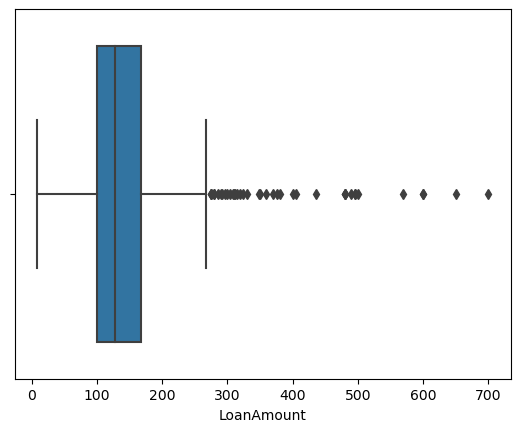

In [9]:


import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dataFrame = pd.read_csv("LoanStatus.csv")

# სვეტის არჩევა
sns.boxplot(x=dataFrame['LoanAmount'])

plt.show()



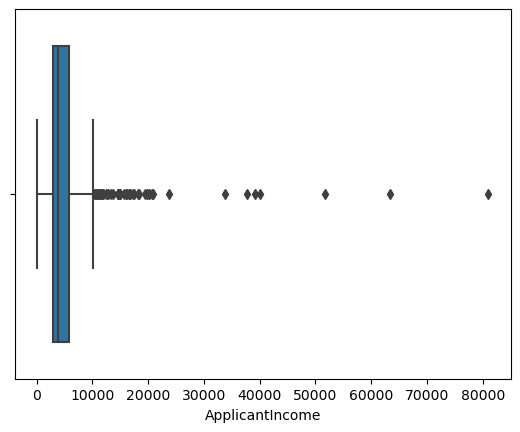

In [10]:
sns.boxplot(x=dataFrame['ApplicantIncome'])

plt.show()

## დავალება 6: t-test (2 ქულა)
ა) გააკეთეთ t-test ანალიზი (One sample t-test)  რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_1samp ფუნქცია. 

ბ) გააკეთეთ t-test ანალიზი (Two sample t-test) რომელიმე სვეტის მიმართ და გამოიყენეთ  ttest_ind ფუნქცია. 

განსაზღვრეთ ნულოვანი და ალტერნატიული ჰიპოთეზა, გამოიყენეთ აღნიშნული ფუნქციები და მოახდინეთ შედეგების სიტყვიერი ინტერპრეტაცია.

In [ ]:
from scipy.stats import ttest_1samp,ttest_ind
import scipy.stats as stats 

t_statistic, p_value = stats.ttest_1samp(a=df['ApplicantIncome'], popmean=5000) 
print(t_statistic , p_value)

In [ ]:
df_clean = df.dropna(subset=['LoanAmount', 'ApplicantIncome'])
# აკეთებს  t-test ანალიზი cleaning data-ზე
t_stat, p_value = stats.ttest_ind(a=df_clean['LoanAmount'], b=df_clean['ApplicantIncome'], equal_var=True)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")